## This Jupypter Notebook will be used for Capstone project for IBM DataScience Course

### Description of the problem :

In the modern era of cities getting developed at a rapid pace and human migration happening towards the cities we examine that the roads which was meant for smooth traffic movement are getting congested. This is resulting in more accidents as the years pass by. Some are non severe and some gets more severe. 
This data set is the collection of such data of severity of accidents , time , location , road conditions , weather conditions , Accident type , type of collisions , people involved , vehicle involved etc. 
 
We should be able to :
 
1.Predict the severity of a accident given the nature of accident. 
 
2.Understand what factors lead to an accident to get Severe.
 
This helps in faster rescue and improving the conditions such that no of severe accident gets reduces.

### Description of Data :

The given data has 194673 reports of accidents.
 
The labelled column is SEVERITYCODE which has data in 1 and 2 which means 'prop damage' and 'injury'.
 
We have location co-ordinates along Location description which gives the exact street or location where accident has occurred.

Incident date and time is provided which is for past 20 years data when the accident occurred.
 
SDOT_COLCODE indicates the code in which it represent which vehicle involved in accident and the point of impact . Eg code of 14 indicates "MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END" .

Similarly we have ST_COLCODE which indicates movement of vehicles when the impact happened. Eg code of 14  indicates "From same direction - both going straight - one stopped - rear-end" . 

To understand the conditions when the accident occurred we have WEATHER , ROADCOND, LIGHTCOND which says the weather conditions , road conditions and light conditions.
 
Attributes like PERSONCOUNT ,PEDCOUNT ,PEDCYLCOUNT ,VEHCOUNT are numerical variables which gives the count of Persons , Pedestrians , Pedestrian cycles and Vehicles involved in the accident.
 
We also have some unique identifiers like ESRI unique identifier , Incident Keys. 

### How can we solve this Problem:
 
We have a huge data set and the target columns has either 1 and 2 are predictors which means its a categorical variable and not continuous.
 
Given the size of data and nature of prediction we should try using Logistic Regression to solve this approach. 
 
SVM is ineffective with huge datasets and hence should be avoided.
 
KNN comes with huge computational cost and is ineffective with huge data set.
We have less continuous variables that can we used to predict categorical data. We can use Annova test for feature selection here along with p-value for statistical significance.
 
There are a lot of Categorical data and first we need to use dimensionality reduction to reduce the categories.
 Then we can use Chi2 test along with p-value to get the needful features out the given data.
 
For location variables we need to understand is there any patterns in understanding which location has more severity impact. If yes we can divide the locations in categories of highly impactful and less impactful.
 
Other variables which are unique or has very less data can be removed as they will be less effective in predicting the labelled data.

### Importing all libraries for this project and dataset for the project

In [220]:
# Importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib  import cm
import sklearn.feature_selection as fs
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [4]:
# Importing the Data-Collisions.csv file in pandas dataframe
fileloc = 'C:/Kedhar/IBM Data Science/Capstone/Data-Collisions.csv'
acc = pd.read_csv(fileloc)

C:\Users\knatekar.ORADEV\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Analysis and Exploration

In [5]:
# Understanding Rows and columns in dataset
acc.shape

(194673, 38)

In [6]:
# Understanding the continous variables stats
acc.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
# Datatypes currently assigned to attributes
acc.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
# Does the Labelled column has null values
acc['SEVERITYCODE'].isna().any()

False

Text(0.5, 1.0, 'Severity code counts')

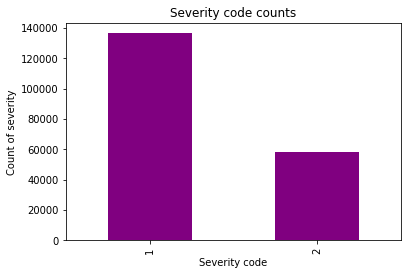

In [9]:
# Understanding the distibution of labelled data 
acc['SEVERITYCODE'].value_counts().plot(kind = 'bar',color='purple')
plt.xlabel('Severity code')
plt.ylabel('Count of severity')
plt.title('Severity code counts')

In [10]:
# Checking if OBJECTID , INCKEY , COLDETKEY , REPORTNO is unique
acc['OBJECTID'].value_counts().sum()

194673

In [11]:
acc['INCKEY'].value_counts().sum()

194673

In [12]:
acc['COLDETKEY'].value_counts().sum()

194673

In [13]:
acc['REPORTNO'].value_counts().sum()

194673

In [14]:
# Dropping these attribtes from df
acc.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO'],axis = 1, inplace = True)

In [15]:
# Checking the values for EXCEPTRSNCODE and EXCEPTRSNDESC
acc[['EXCEPTRSNCODE','EXCEPTRSNDESC']].groupby(['EXCEPTRSNCODE','EXCEPTRSNDESC']).sum()

,
EXCEPTRSNCODE,EXCEPTRSNDESC
NEI,"Not Enough Information, or Insufficient Location Information"


In [16]:
# Dropping both columns as they dont contain any extra info
acc.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC'],axis = 1 , inplace = True)

In [17]:
# Checking INATTENTIONIND and its value counts
acc['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [18]:
acc['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [19]:
acc['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [20]:
# Dropping these attributes as mentioned above they have only one value
acc.drop(['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'],axis = 1 , inplace = True)

In [21]:
# Percentage of data not populated for SDOTCOLNUM
acc['SDOTCOLNUM'].isna().sum() *100 / acc.shape[0]

40.95945508622151

In [22]:
# 40% of records are Null and hence this column wont add any benifit in model. Dropping the same
acc.drop(['SDOTCOLNUM'],axis = 1 , inplace = True)

In [23]:
# ST_COLCODE and ST_COLDESC looks one is code and one is description
groupbydf = acc[["ST_COLCODE", "ST_COLDESC"]].groupby(by = ["ST_COLCODE", "ST_COLDESC"]).sum()
groupbydf

,
ST_COLCODE,ST_COLDESC
0,Vehicle going straight hits pedestrian
1,Vehicle turning right hits pedestrian
2,Vehicle turning left hits pedestrian
3,Vehicle backing hits pedestrian
4,Vehicle hits Pedestrian - All Other Actions
...,...
83,Same direction -- both turning left -- both moving -- rear end
84,Same direction -- both turning left -- one stopped -- rear end
85,Vehicle Strikes Deer


In [24]:
# Dropping ST_COLDESC as it holds value for description for a given ST_COLCODE
acc.drop(['ST_COLDESC'],axis = 1 , inplace = True)

In [25]:
# Similarly SDOT_COLDESC contains description for SDOT_COLCODE
groupbydf = acc[["SDOT_COLCODE", "SDOT_COLDESC"]].groupby(by = ["SDOT_COLCODE", "SDOT_COLDESC"]).sum()
groupbydf

,
SDOT_COLCODE,SDOT_COLDESC
0,NOT ENOUGH INFORMATION / NOT APPLICABLE
11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE"
12,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE"
13,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE"
14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END"
15,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE"
16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE"
18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE"
21,"MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END"


In [26]:
acc.drop(['SDOT_COLDESC'],axis = 1 , inplace = True)

In [27]:
# Understanding data in SEGLANEKEY and CROSSWALKKEY
acc['SEGLANEKEY'].value_counts()
# Out of 194673 rows 191907 is populated as 0

0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64

In [28]:
acc['CROSSWALKKEY'].value_counts()
# Out of 194673 rows 190862 is populated as 0

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [29]:
# Dropping both columns as very less data is relevant for modelling.
acc.drop(['SEGLANEKEY','CROSSWALKKEY'],axis = 1 , inplace = True)

In [30]:
# UNDERINFL has both 0 and N or 1 or Y. This needs a fix
acc['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [31]:
# Mapping Y and N to 1 and 0 as strings 
acc['UNDERINFL'].replace(['Y','N'],['1','0'], inplace=True)
acc['UNDERINFL'].value_counts()

0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [32]:
# nearly 4k records have null stamped. Lets stamp it to 0 as its the most occurring
acc['UNDERINFL'][acc['UNDERINFL'].isna()].shape

(4884,)

In [33]:
# Now we will convert to Integer from string
acc['UNDERINFL'].fillna('0' , inplace=True)
acc['UNDERINFL'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
194668    0
194669    0
194670    0
194671    0
194672    0
Name: UNDERINFL, Length: 194673, dtype: int32

In [34]:
# Checking if any more values are null
acc['UNDERINFL'].isna().any()

False

In [35]:
# Converting object datatype to datetime
acc['INCDATE'] = pd.to_datetime(acc['INCDATE']) 
acc['INCDTTM'] = pd.to_datetime(acc['INCDTTM']) 

In [36]:
# Its seen that INCDTTM has both date and time.. Hence INCDATE is not needed
acc.drop(['INCDATE'],axis = 1 , inplace = True)

In [37]:
# There is another column called SEVERITYCODE.1 and its description in SEVERITYDESC. Lets see if thats different
acc[['SEVERITYCODE','SEVERITYCODE.1','SEVERITYDESC']][acc['SEVERITYCODE']!= acc['SEVERITYCODE.1']]

,SEVERITYCODE,SEVERITYCODE.1,SEVERITYDESC


In [38]:
# Lets drop both attributes now
acc.drop(['SEVERITYCODE.1','SEVERITYDESC'],axis = 1 , inplace = True)

In [39]:
# Understanding STATUS attribute
acc['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [40]:
# Checking if any value is null
acc['STATUS'].isna().any()

False

In [41]:
# We can code Matched to 1 and Unmatched to 0 and convert them to integer
acc['STATUS'].replace(['Matched','Unmatched'],['1','0'], inplace=True)
acc['STATUS'].astype(int)
acc['STATUS'].value_counts()

1    189786
0      4887
Name: STATUS, dtype: int64

In [42]:
# Understanding INTKEY null value counts
((acc['INTKEY'][acc['INTKEY'].isna()].shape[0]) * 100) / acc.shape[0]

66.57471760336564

In [43]:
# 66 % has null values.. Hence this attribute can be dropped
acc.drop(['INTKEY'],axis = 1 , inplace = True)

In [44]:
# Checking values for COLLISIONTYPE attribute
acc['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

Text(0.5, 1.0, 'Collision types counts w.r.t Severity Codes')

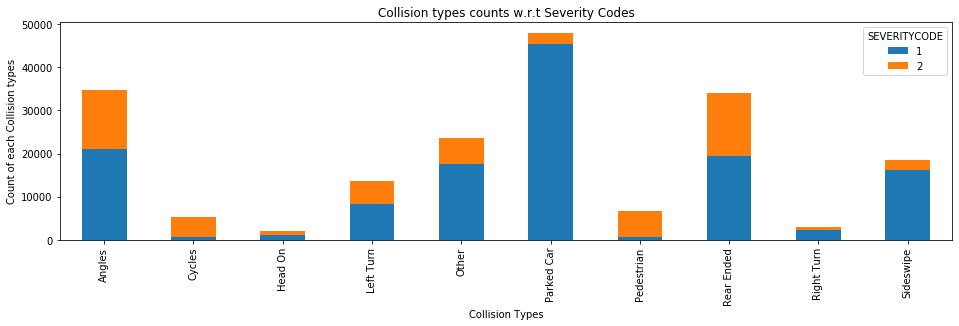

In [45]:
# Understanding how COLLISIONTYPE affects SEVERITYCODE for not null values
plt.rcParams["figure.figsize"] = [16,4]
acc[['COLLISIONTYPE','SEVERITYCODE']].groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Collision Types')
plt.ylabel('Count of each Collision types')
plt.title('Collision types counts w.r.t Severity Codes')

Text(0.5, 1.0, 'Collision types for null values counts w.r.t Severity Codes')

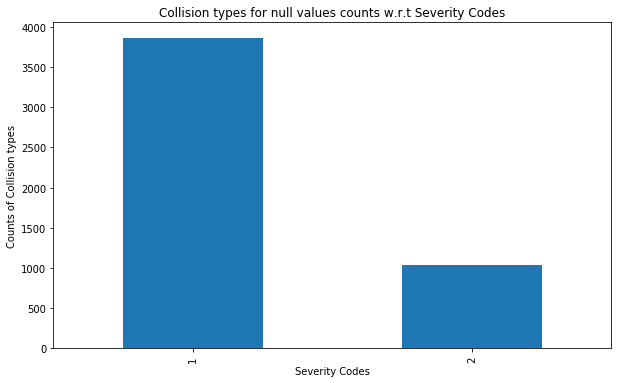

In [46]:
# Understanding how Null COLLISIONTYPE affects SEVERITYCODE
plt.rcParams["figure.figsize"] = [10,6]
acc['SEVERITYCODE'][acc['COLLISIONTYPE'].isna() == True].value_counts().plot(kind='bar')
plt.xlabel('Severity Codes')
plt.ylabel('Counts of Collision types')
plt.title('Collision types for null values counts w.r.t Severity Codes')

In [47]:
# Its seen that for Not Null values Parked Car has highest volume of Severity code of 1 and propotionally less with 2
# Same exists for Null Collision Types. It also has high volume for severity code of 1.
# Hence we can stamp the null Collision Types with values for Parked Car
acc['COLLISIONTYPE'].fillna('Parked Car',inplace=True)

In [48]:
# Checking nulls for PERSONCOUNT
acc['PERSONCOUNT'].isna().any()

False

Text(0.5, 1.0, 'Person counts involved in accident')

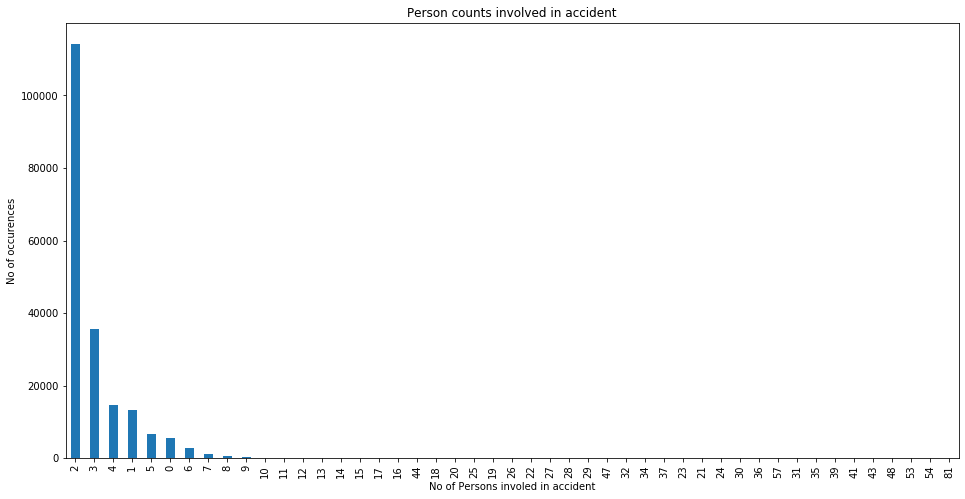

In [49]:
# Understanding distribution for PERSONCOUNT
plt.rcParams["figure.figsize"] = [16,8]
acc['PERSONCOUNT'].value_counts().plot(kind='bar')
plt.xlabel('No of Persons involed in accident')
plt.ylabel('No of occurences')
plt.title('Person counts involved in accident')

In [50]:
# Checking nulls for PEDCOUNT
acc['PEDCOUNT'].isna().any()

False

Text(0.5, 1.0, 'Pedestrian counts involved in accident')

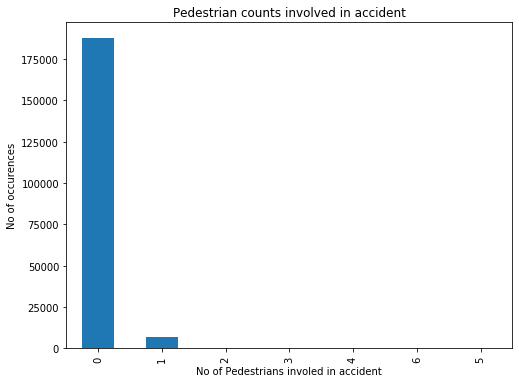

In [51]:
# Understanding distribution for PEDCOUNT
plt.rcParams["figure.figsize"] = [8,6]
acc['PEDCOUNT'].value_counts().plot(kind='bar')
plt.xlabel('No of Pedestrians involed in accident')
plt.ylabel('No of occurences')
plt.title('Pedestrian counts involved in accident')

In [52]:
# Checking nulls for PEDCYLCOUNT
acc['PEDCYLCOUNT'].isna().any()

False

Text(0.5, 1.0, 'Cycle Pedestrian counts involved in accident')

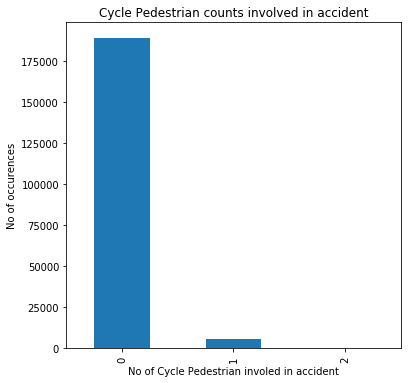

In [53]:
# Understanding distribution for PEDCYLCOUNT
plt.rcParams["figure.figsize"] = [6,6]
acc['PEDCYLCOUNT'].value_counts().plot(kind='bar')
plt.xlabel('No of Cycle Pedestrian involed in accident')
plt.ylabel('No of occurences')
plt.title('Cycle Pedestrian counts involved in accident')

In [54]:
# Checking nulls for VEHCOUNT
acc['VEHCOUNT'].isna().any()

False

Text(0.5, 1.0, 'Vehicle count involved in accident')

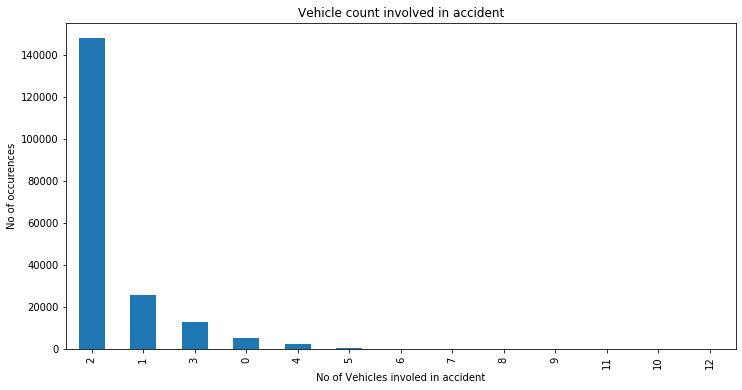

In [55]:
# Understanding distribution for VEHCOUNT
plt.rcParams["figure.figsize"] = [12,6]
acc['VEHCOUNT'].value_counts().plot(kind='bar')
plt.xlabel('No of Vehicles involed in accident')
plt.ylabel('No of occurences')
plt.title('Vehicle count involved in accident')

In [56]:
# Now lets take a date time field called Incident Time and try finding can be derive any patterns using datetime
acc['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
                 ...        
194668   2018-11-12 08:12:00
194669   2018-12-18 09:14:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
194672   2018-11-30 15:45:00
Name: INCDTTM, Length: 194673, dtype: datetime64[ns]

In [57]:
#Checking if there are any null values
acc['INCDTTM'].isna().any()

False

Text(0.5, 1.0, 'Plot for each hour at which accident was occurred')

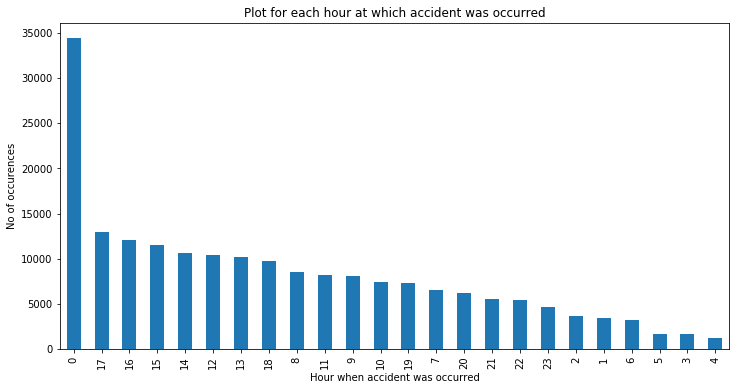

In [58]:
# Deriving the Hour attribte to check which hour or day most accidents occur

tempdf = acc['INCDTTM'].apply(lambda x : datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').hour)
tempdf.value_counts().plot(kind='bar')
plt.xlabel('Hour when accident was occurred')
plt.ylabel('No of occurences')
plt.title('Plot for each hour at which accident was occurred')

# As below we see 0 hour is most no of accidents. Its not becuase they occur at mignight. 
# but in given data timestamp is defined as 00:00:00 . Hence there are more such records of that kind. We can ignore hour

Text(0.5, 1.0, 'Plot for each Weekday at which accident was occurred')

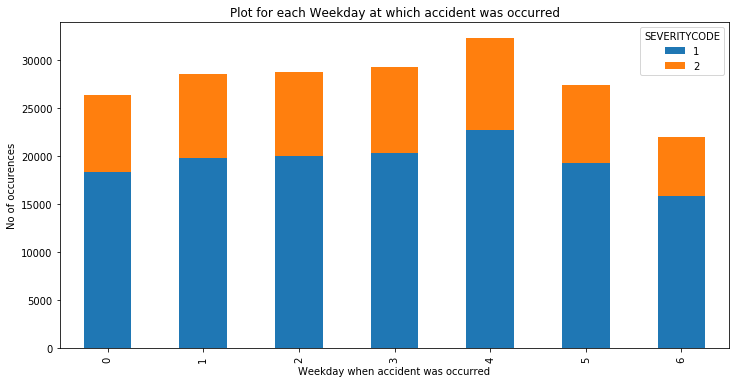

In [59]:
# Checking if weekday affects the severity
tempdf =acc['INCDTTM'].apply(lambda x : datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').weekday()).to_frame()
tempdf['SEVERITYCODE'] = acc['SEVERITYCODE']
tempdf[['INCDTTM','SEVERITYCODE']].groupby(['INCDTTM','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Weekday when accident was occurred')
plt.ylabel('No of occurences')
plt.title('Plot for each Weekday at which accident was occurred')
# There seems to be a normal distribution and hence can be ignored

Text(0.5, 1.0, 'Plot for each month at which accident was occurred')

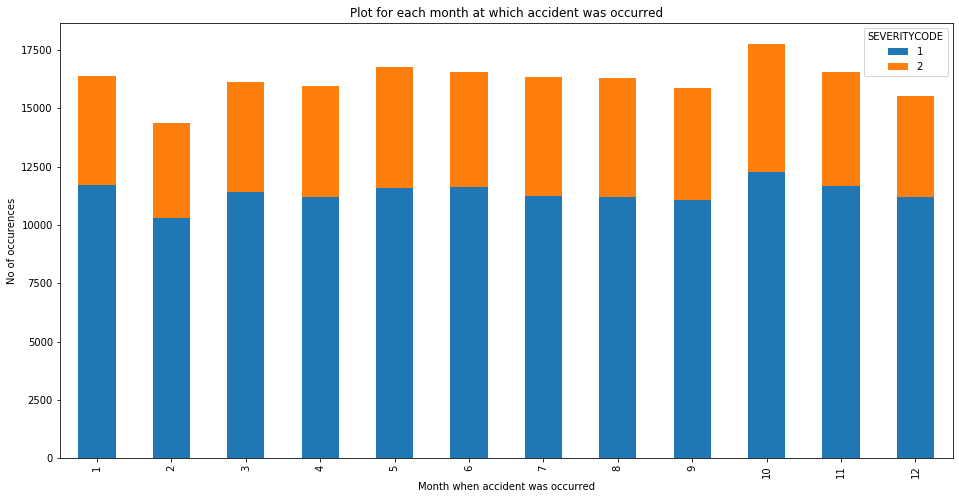

In [60]:
# Checking the same for month 
plt.rcParams["figure.figsize"] = [16,8]
tempdf =acc['INCDTTM'].apply(lambda x : datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').month).to_frame()
tempdf['SEVERITYCODE'] = acc['SEVERITYCODE']
tempdf[['INCDTTM','SEVERITYCODE']].groupby(['INCDTTM','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Month when accident was occurred')
plt.ylabel('No of occurences')
plt.title('Plot for each month at which accident was occurred')

# Even month has normal distribution so can be ignored

In [61]:
# We can conclude that Incident time doesnt affect the severity by any way just by looking at hour , month plots.
# Hence we can drop this attribute
acc.drop(['INCDTTM'],axis = 1 , inplace = True)

Text(0.5, 1.0, 'No of occurences for null values of Junction Type')

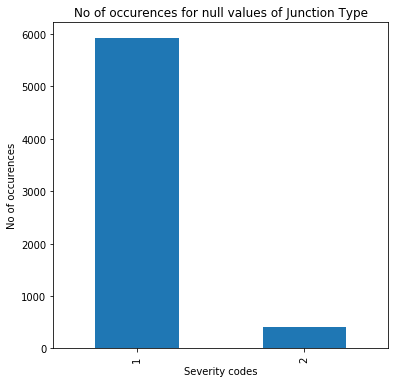

In [62]:
# Understanding JUNCTIONTYPE plots for null values
plt.rcParams["figure.figsize"] = [6,6]
tempdf = acc['SEVERITYCODE'][acc['JUNCTIONTYPE'].isna() == True].to_frame()
tempdf.groupby(['SEVERITYCODE']).size().plot(kind='bar')
plt.xlabel('Severity codes')
plt.ylabel('No of occurences')
plt.title('No of occurences for null values of Junction Type')

Text(0.5, 1.0, 'No of occurences for of Junction Type w.r.t Severity Codes')

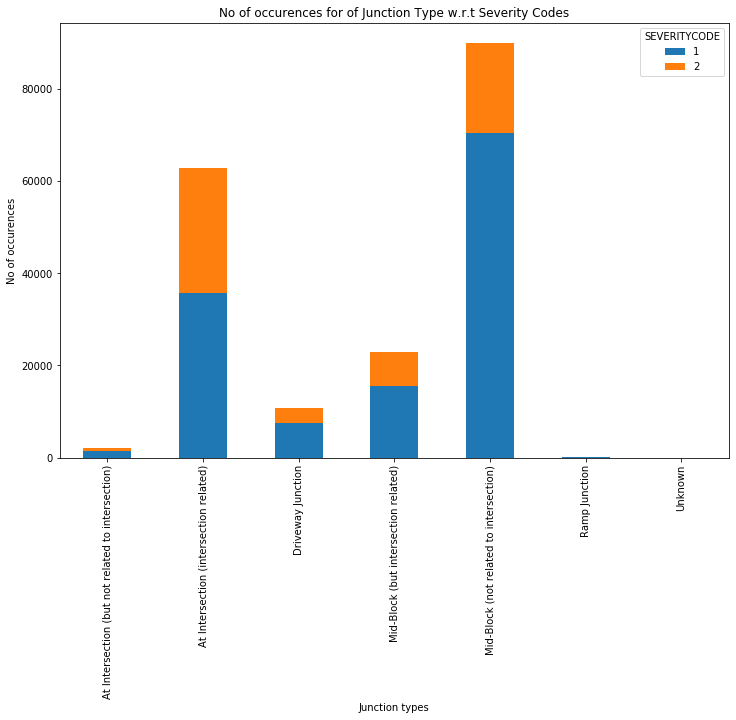

In [63]:
# JUNCTIONTYPE plots for Not null value
plt.rcParams["figure.figsize"] = [12,8]
acc[['JUNCTIONTYPE','SEVERITYCODE']].groupby(['JUNCTIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Junction types')
plt.ylabel('No of occurences')
plt.title('No of occurences for of Junction Type w.r.t Severity Codes')

In [64]:
# Now we know that the distribution is more or less the same for null or not null values for JUNCTIONTYPE
# But we also see Unknown type of JUNCTIONTYPE. we can mark the Nulls as Unknown
acc['JUNCTIONTYPE'].fillna('Unknown',inplace=True)

Text(0.5, 1.0, 'No of occurences for of Junction Type w.r.t Severity Codes')

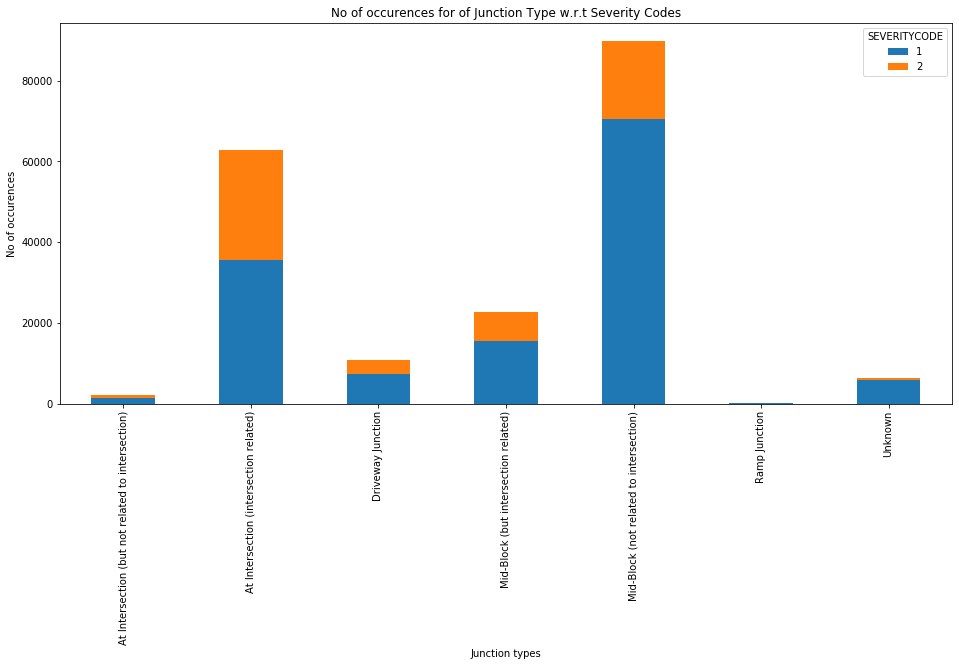

In [65]:
# After fixing the missing values Bar plot looks as below
plt.rcParams["figure.figsize"] = [16,7]
acc[['JUNCTIONTYPE','SEVERITYCODE']].groupby(['JUNCTIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Junction types')
plt.ylabel('No of occurences')
plt.title('No of occurences for of Junction Type w.r.t Severity Codes')

Text(0.5, 1.0, 'No of occurences for SDOT Colcodes w.r.t Severity Codes')

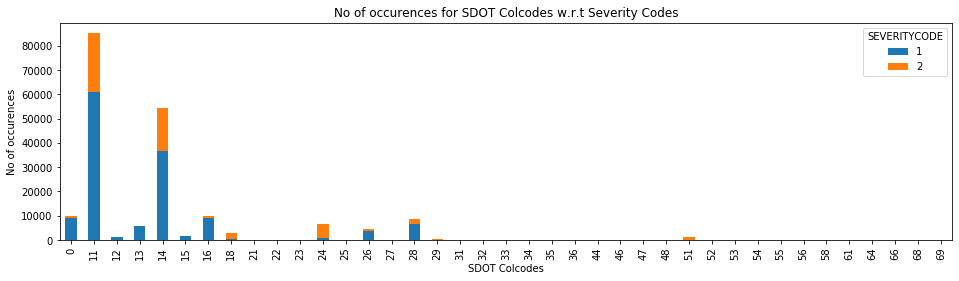

In [66]:
# Understanding SDOT_COLCODE distribution
plt.rcParams["figure.figsize"] = [16,4]
acc[['SDOT_COLCODE','SEVERITYCODE']].groupby(['SDOT_COLCODE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('SDOT Colcodes')
plt.ylabel('No of occurences')
plt.title('No of occurences for SDOT Colcodes w.r.t Severity Codes')

In [67]:
# we can see that 11 and 14 are dominent categories for SDOT_COLCODE . Rest are very minimal comparitavely.
# rest can be converted into new code say 70
acc['SDOT_COLCODE'].isna().any()

False

In [68]:
# Remapping the SDOT_COLCODE with new code 70
def sdot_map(v):
    if v == 11:
        return 11
    elif v == 14:
        return 14
    else:
        return 70

acc['SDOT_COLCODE'] = acc['SDOT_COLCODE'].apply(lambda x : sdot_map(x))

Text(0.5, 1.0, 'No of occurences for SDOT Colcodes w.r.t Severity Codes')

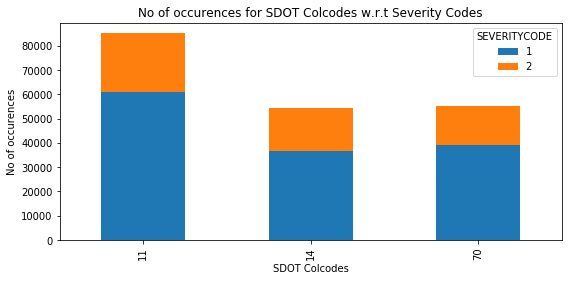

In [69]:
# Plotting for new code values for SDOT_COLCODE
plt.rcParams["figure.figsize"] = [9,4]
acc[['SDOT_COLCODE','SEVERITYCODE']].groupby(['SDOT_COLCODE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('SDOT Colcodes')
plt.ylabel('No of occurences')
plt.title('No of occurences for SDOT Colcodes w.r.t Severity Codes')

In [70]:
# Understanding WEATHER values for null
acc['WEATHER'][acc['WEATHER'].isna()==True].shape

(5081,)

Text(0.5, 1.0, 'No of occurences for Weather conditions w.r.t Severity Codes')

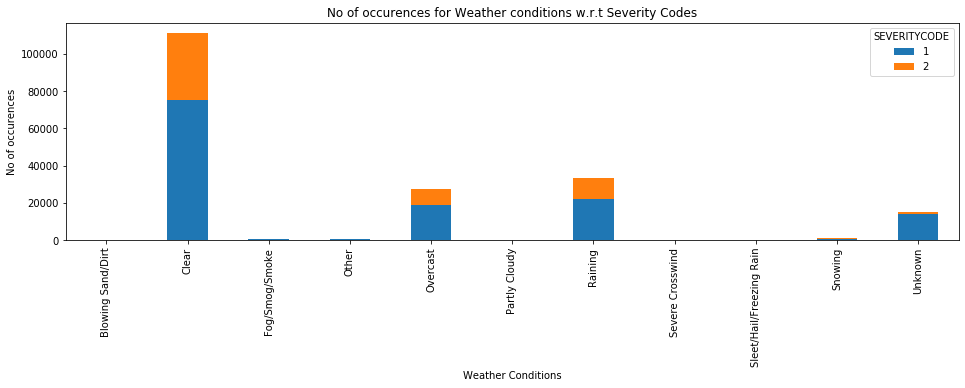

In [71]:
# Spread of WEATHER for ot null values
plt.rcParams["figure.figsize"] = [16,4]
acc[['WEATHER','SEVERITYCODE']].groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Weather Conditions')
plt.ylabel('No of occurences')
plt.title('No of occurences for Weather conditions w.r.t Severity Codes')

In [72]:
# We can broadly categorize Weather into 'Clear' , 'Overcase' ,'Raining' and 'Others'
# We need to group all others including null values in Others category

def weather_map(v):
    if v in ['Clear','Overcast','Raining']:
        return v
    else:
        return 'Other'
    
acc['WEATHER'] = acc['WEATHER'].apply(lambda x : weather_map(x))

Text(0.5, 1.0, 'No of occurences for Weather conditions w.r.t Severity Codes')

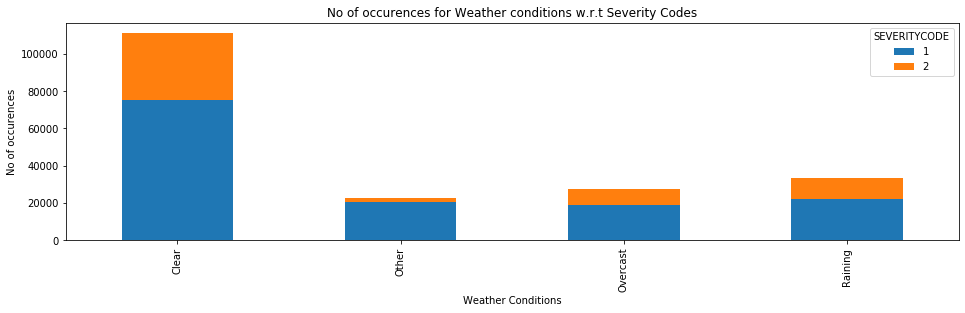

In [73]:
# Weather values after datafix
acc[['WEATHER','SEVERITYCODE']].groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Weather Conditions')
plt.ylabel('No of occurences')
plt.title('No of occurences for Weather conditions w.r.t Severity Codes')

In [74]:
# Understanding ROADCOND has null values
acc['ROADCOND'][acc['ROADCOND'].isna()==True].shape

(5012,)

Text(0.5, 1.0, 'No of occurences for Road conditions w.r.t Severity Codes')

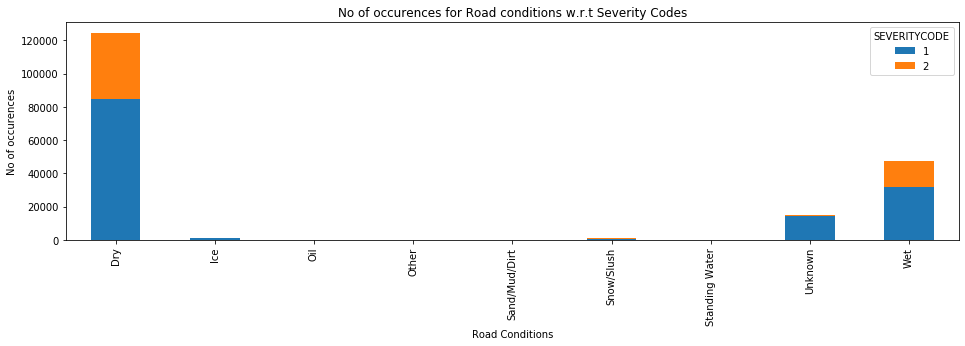

In [75]:
# Plotting values of ROADCOND for not null values
plt.rcParams["figure.figsize"] = [16,4]
acc[['ROADCOND','SEVERITYCODE']].groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Road Conditions')
plt.ylabel('No of occurences')
plt.title('No of occurences for Road conditions w.r.t Severity Codes')

In [76]:
# We can broadly categorize into 'Dry' , 'Wet' and 'Other' . All null values will be stamped as 'Other'

def roadcond_map(v):
    if v in ['Dry','Wet']:
        return v
    else:
        return 'Other'

acc['ROADCOND'] = acc['ROADCOND'].apply(lambda x : roadcond_map(x))

Text(0.5, 1.0, 'No of occurences for Road conditions w.r.t Severity Codes')

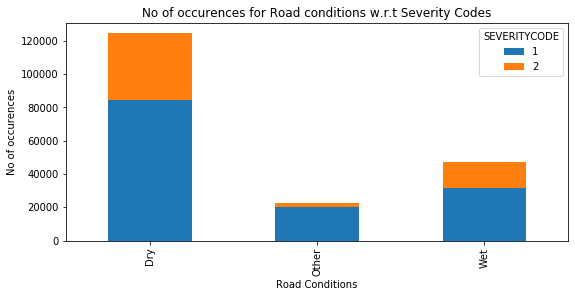

In [77]:
# Plotting after datafix for ROADCOND
plt.rcParams["figure.figsize"] = [9,4]
acc[['ROADCOND','SEVERITYCODE']].groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Road Conditions')
plt.ylabel('No of occurences')
plt.title('No of occurences for Road conditions w.r.t Severity Codes')

In [78]:
# Checking null values for LIGHTCOND
acc['LIGHTCOND'][acc['LIGHTCOND'].isna()==True].shape

(5170,)

Text(0.5, 1.0, 'No of occurences for Light conditions w.r.t Severity Codes')

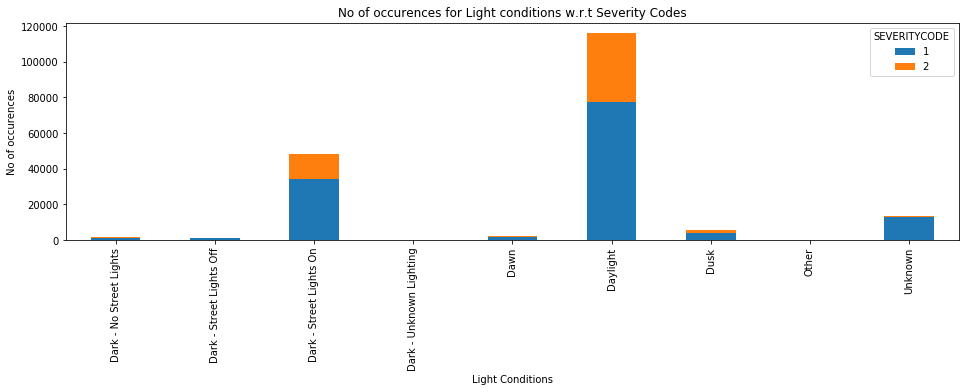

In [79]:
# Plotting Not Null values for LIGHTCOND
plt.rcParams["figure.figsize"] = [16,4]
acc[['LIGHTCOND','SEVERITYCODE']].groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Light Conditions')
plt.ylabel('No of occurences')
plt.title('No of occurences for Light conditions w.r.t Severity Codes')

In [80]:
# Its seen that LIGHTCOND can be broadly categorized into 'Daylight','Dark - Street Lights On' and 'Other'
def lightcond_map(v):
    if v in ['Dark - Street Lights On','Daylight']:
        return v
    else:
        return 'Other'

acc['LIGHTCOND'] = acc['LIGHTCOND'].apply(lambda x : lightcond_map(x))

Text(0.5, 1.0, 'No of occurences for Light conditions w.r.t Severity Codes')

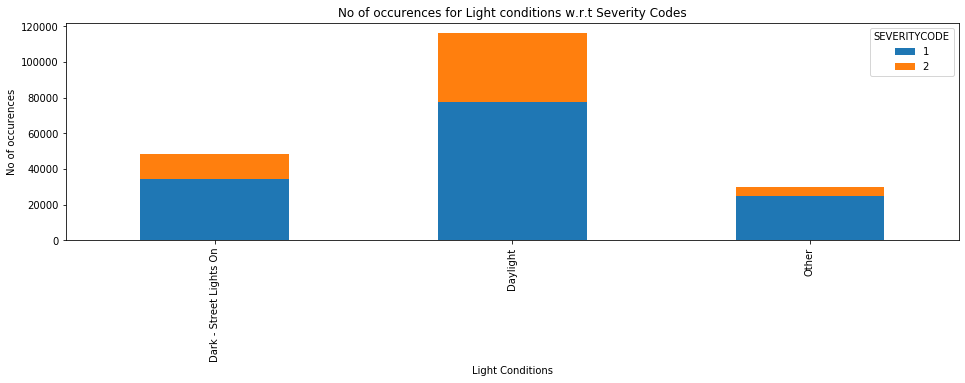

In [81]:
# Plotting after datafix for LIGHTCOND
acc[['LIGHTCOND','SEVERITYCODE']].groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Light Conditions')
plt.ylabel('No of occurences')
plt.title('No of occurences for Light conditions w.r.t Severity Codes')

In [82]:
# Understanding ST_COLCODE Null values
acc['ST_COLCODE'][acc['ST_COLCODE'].isna()==True].shape

(18,)

Text(0.5, 1.0, 'No of occurences for ST_COLCODE w.r.t Severity Codes')

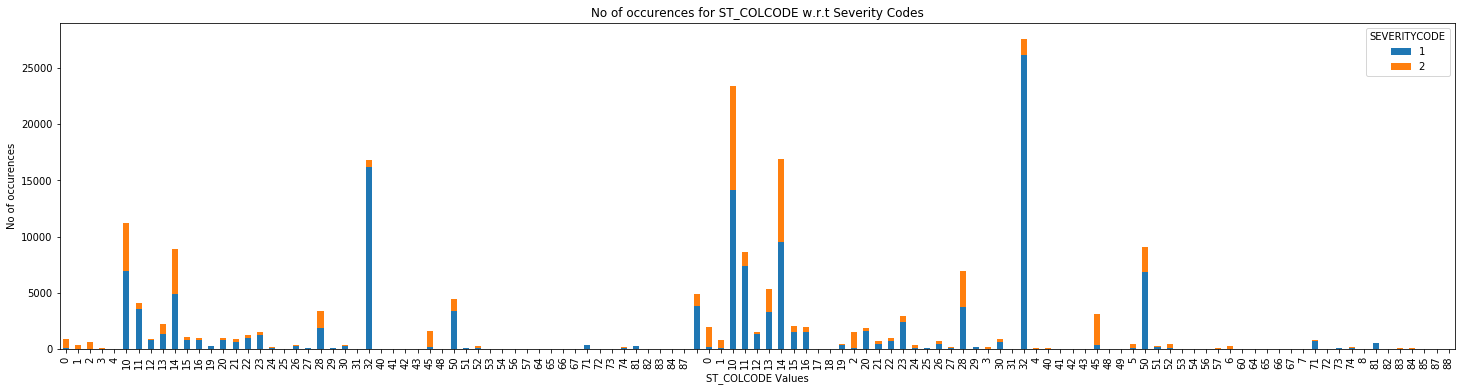

In [83]:
# Ploting ST_COLCODE for a SEVERITYCODE . But plot looks dissorted and repeated values . 
# This might be because its Object instead of int
plt.rcParams["figure.figsize"] = [25,6]
acc[['ST_COLCODE','SEVERITYCODE']].groupby(['ST_COLCODE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('ST_COLCODE Values')
plt.ylabel('No of occurences')
plt.title('No of occurences for ST_COLCODE w.r.t Severity Codes')

In [84]:
# 32 looks highly populated. Hence populating null values to 32
acc['ST_COLCODE'].fillna('32',inplace=True)

In [85]:
# We still have space ' ' in ST_COLCODE which is not allowing to convert to int
temp = acc['ST_COLCODE'].unique().tolist()
temp

['10',
 '11',
 '32',
 '23',
 '5',
 '22',
 '14',
 '30',
 ' ',
 '28',
 '51',
 '13',
 '50',
 '12',
 '45',
 '0',
 '20',
 '21',
 '1',
 '52',
 '16',
 '15',
 '74',
 '81',
 '26',
 '19',
 '2',
 '66',
 '71',
 '3',
 '24',
 '40',
 '57',
 '6',
 '83',
 '25',
 '27',
 '4',
 '72',
 '29',
 '56',
 '73',
 '41',
 '17',
 '65',
 '82',
 '67',
 '49',
 '84',
 '31',
 '43',
 '42',
 '48',
 '64',
 '53',
 32,
 50,
 15,
 10,
 14,
 20,
 13,
 22,
 51,
 11,
 28,
 12,
 52,
 21,
 0,
 19,
 30,
 16,
 40,
 26,
 27,
 83,
 2,
 45,
 65,
 23,
 24,
 71,
 1,
 29,
 81,
 25,
 4,
 73,
 74,
 72,
 3,
 84,
 64,
 57,
 42,
 41,
 48,
 66,
 56,
 31,
 82,
 67,
 '54',
 '60',
 53,
 43,
 87,
 54,
 '87',
 '7',
 '8',
 '85',
 '88',
 '18']

In [86]:
# ' ' is replaced with 32
acc['ST_COLCODE'].replace({' ':32},inplace=True)

In [87]:
# All values are converted to Integer
acc['ST_COLCODE'] = acc['ST_COLCODE'].apply(lambda x: int(x))

Text(0.5, 1.0, 'No of occurences for ST_COLCODE w.r.t Severity Codes')

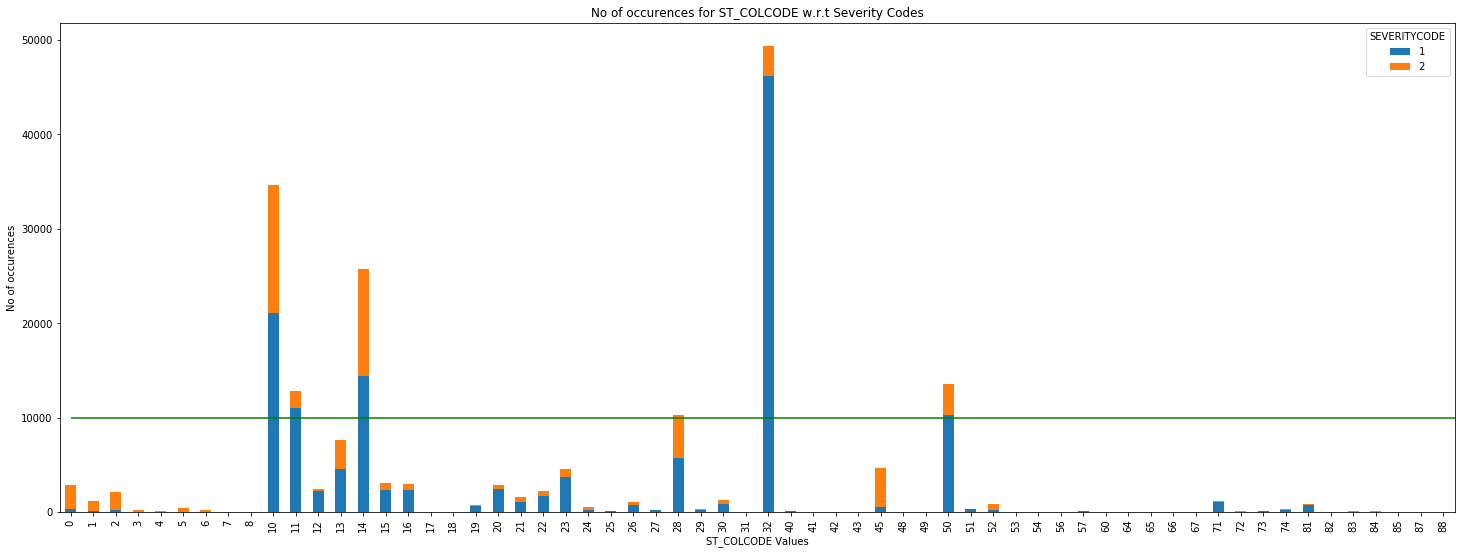

In [88]:
# Plotting the ST_COLCODE again to check the proper distribution
plt.rcParams["figure.figsize"] = [25,9]
acc[['ST_COLCODE','SEVERITYCODE']].groupby(['ST_COLCODE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.hlines(10000,0,88,color='green',label='Cut off line')
plt.xlabel('ST_COLCODE Values')
plt.ylabel('No of occurences')
plt.title('No of occurences for ST_COLCODE w.r.t Severity Codes')

In [89]:
# Its seen that we can give a cut off of 10000 below which we can group them in a separate code say 99
def st_colcode_map(v):
    if v in [10,11,14,28,32,50]:
        return v
    else:
        return 99

acc['ST_COLCODE'] = acc['ST_COLCODE'].apply(lambda x:st_colcode_map(x))

Text(0.5, 1.0, 'No of occurences for ST_COLCODE w.r.t Severity Codes')

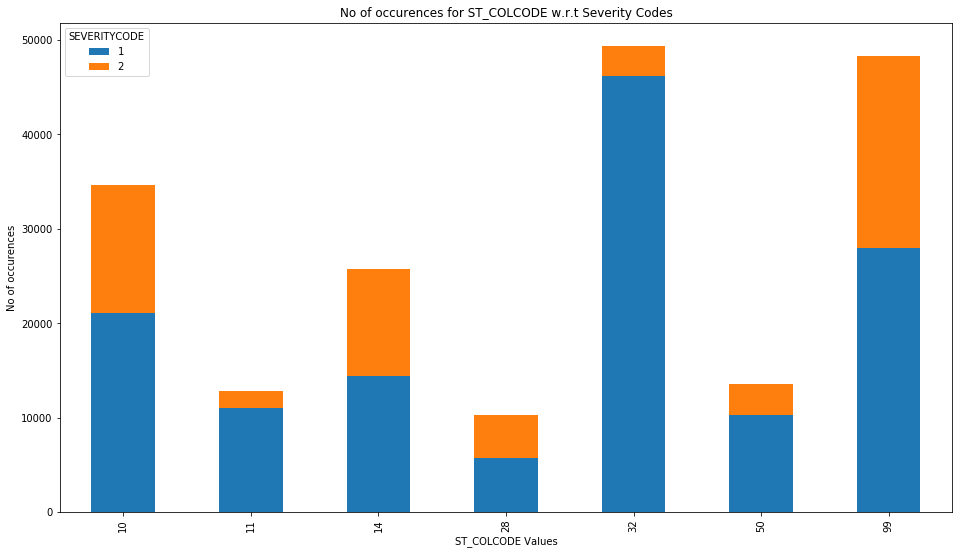

In [90]:
plt.rcParams["figure.figsize"] = [16,9]
acc[['ST_COLCODE','SEVERITYCODE']].groupby(['ST_COLCODE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('ST_COLCODE Values')
plt.ylabel('No of occurences')
plt.title('No of occurences for ST_COLCODE w.r.t Severity Codes')

In [91]:
# Understanding HITPARKEDCAR has null values
acc['HITPARKEDCAR'].isna().any()

False

Text(0.5, 1.0, 'No of occurences for Hit Parked Car w.r.t Severity Codes')

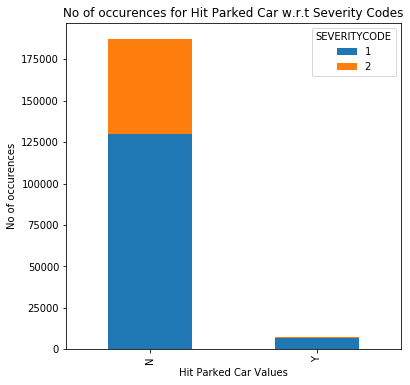

In [92]:
plt.rcParams["figure.figsize"] = [6,6]
acc[['HITPARKEDCAR','SEVERITYCODE']].groupby(['HITPARKEDCAR','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Hit Parked Car Values')
plt.ylabel('No of occurences')
plt.title('No of occurences for Hit Parked Car w.r.t Severity Codes')

In [93]:
# Fixing HITPARKEDCAR with 1 for Y and 0 for N
acc['HITPARKEDCAR'].replace(['Y','N'],['1','0'], inplace=True)
acc['HITPARKEDCAR'].astype(int)
acc['HITPARKEDCAR'].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

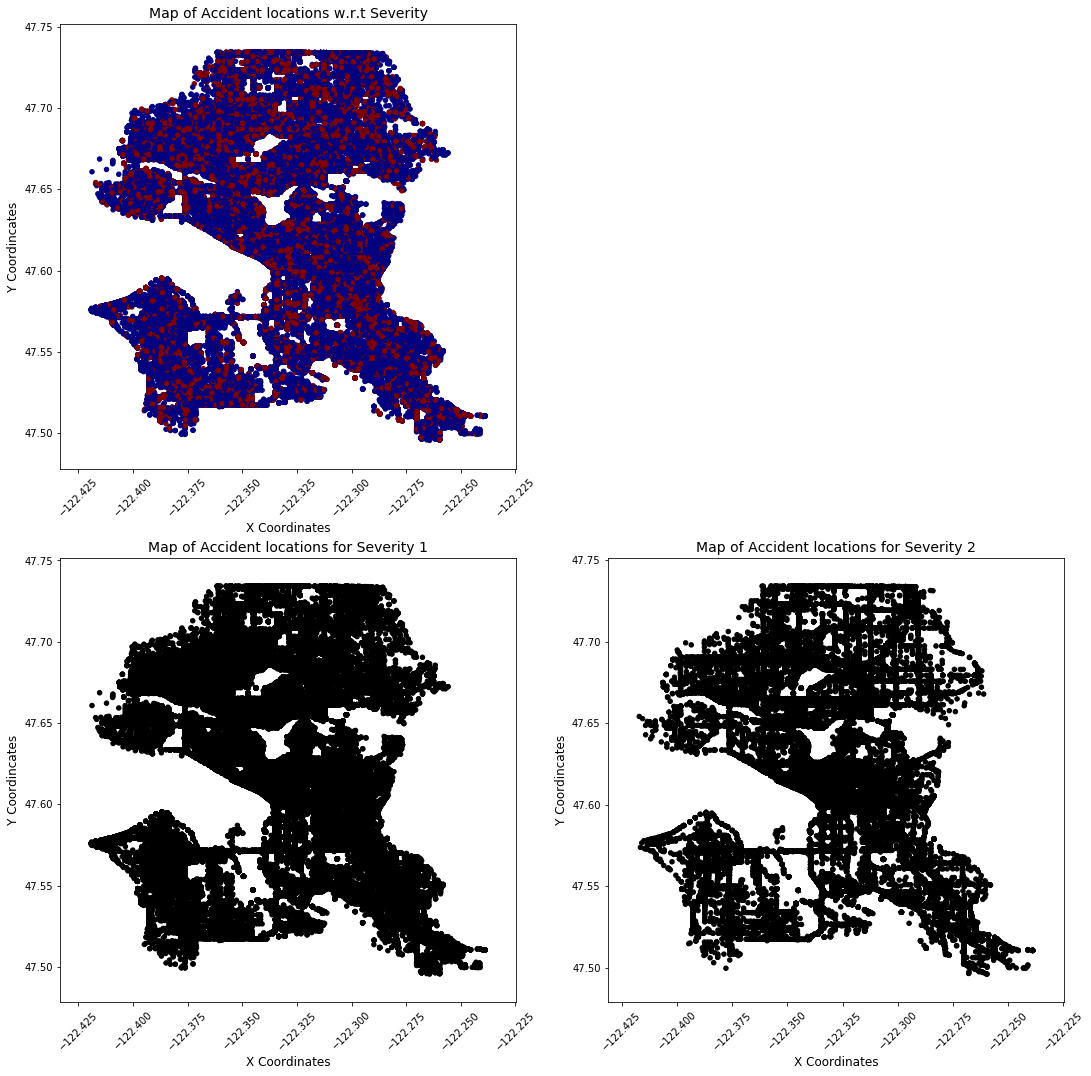

In [94]:
# To understand how Severities is affected for a particular location we need to plot the severity w.r.t X and Y Coordincates

# Defining the figure instance with 2 rows and 2 columns
fig = plt.figure(figsize=(18,18))

# Plotting first plot for Severity on X and Y coordinates for both Sevrity 1 and 2
ax = fig.add_subplot(221)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title("Map of Accident locations w.r.t Severity",fontsize=14)
ax.set_xlabel("X Coordinates",fontsize=12)
ax.set_ylabel("Y Coordincates",fontsize=12)
x = acc['X']
y = acc['Y']
z = acc['SEVERITYCODE']
ax.scatter(x,y,s=20,c=z, marker = 'o', cmap = cm.jet );

# Plotting Third plot for Severity on X and Y coordinates for only Sevrity 1
ax1 = fig.add_subplot(223)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title("Map of Accident locations for Severity 1",fontsize=14)
ax1.set_xlabel("X Coordinates",fontsize=12)
ax1.set_ylabel("Y Coordincates",fontsize=12)
x = acc['X'][acc['SEVERITYCODE']==1]
y = acc['Y'][acc['SEVERITYCODE']==1]
z = acc['SEVERITYCODE'][acc['SEVERITYCODE']==1]
ax1.scatter(x,y,s=20,c=z, marker = 'o', cmap = cm.gist_earth );

# Plotting Fourth plot for Severity on X and Y coordinates for only Sevrity 2
ax2 = fig.add_subplot(224)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax2.set_title("Map of Accident locations for Severity 2",fontsize=14)
ax2.set_xlabel("X Coordinates",fontsize=12)
ax2.set_ylabel("Y Coordincates",fontsize=12)
x = acc['X'][acc['SEVERITYCODE']==2]
y = acc['Y'][acc['SEVERITYCODE']==2]
z = acc['SEVERITYCODE'][acc['SEVERITYCODE']==2]
ax2.scatter(x,y,s=20,c=z, marker = 'o', cmap = cm.gist_earth );

plt.show()

In [224]:
# From above diagrams we see that Severity 1 and 2 are distributed evenly across and none of them is 
# confined to any particlar location. Hence we can remove these X and Y coordinates along with Location.
acc.drop(['X','Y','LOCATION'],axis = 1, inplace = True)

KeyError: "['X' 'Y' 'LOCATION'] not found in axis"

Text(0.5, 1.0, 'No of occurences for each address type w.r.t Severity Codes')

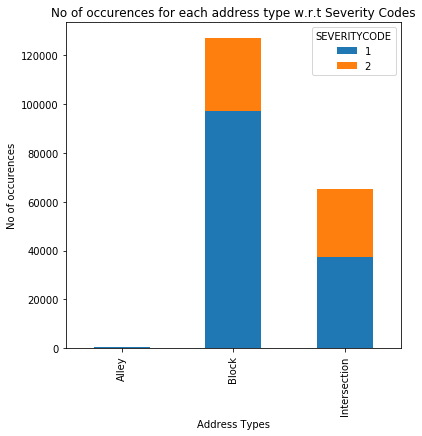

In [96]:
# Understanding ADDRTYPE distribution
acc[['ADDRTYPE','SEVERITYCODE']].groupby(['ADDRTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Address Types')
plt.ylabel('No of occurences')
plt.title('No of occurences for each address type w.r.t Severity Codes')

In [97]:
# Checking number of nulls in ADDRTYPE
acc['ADDRTYPE'][acc['ADDRTYPE'].isna()==True].shape

(1926,)

Text(0.5, 1.0, 'No of occurences for each address type w.r.t Junction Types')

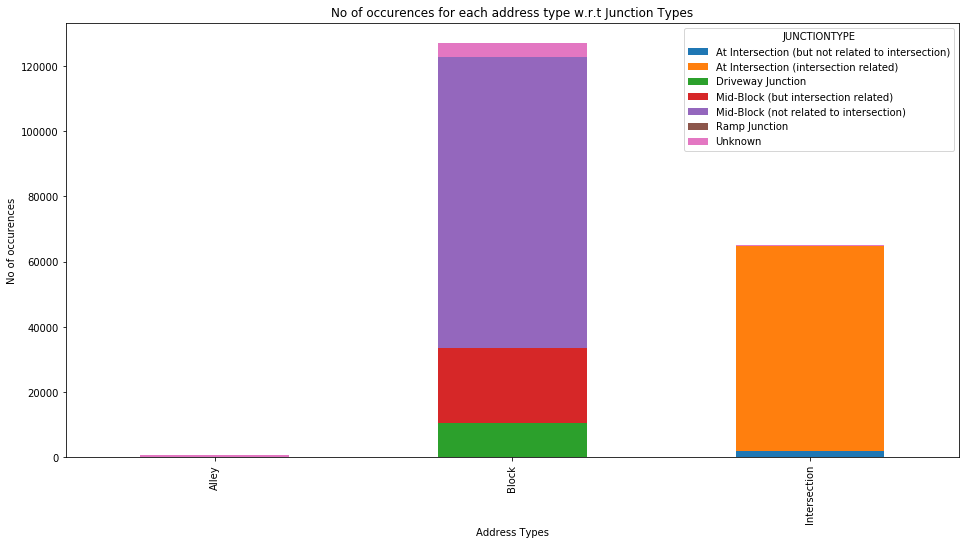

In [98]:
# It looks like ADDRTYPE is related to earlier seen JUNCTIONTYPE as it classifies into Intersection , Block and Alley
# Plotting ADDRTYPE and JUNCTIONTYPE
plt.rcParams["figure.figsize"] = [16,8]
acc[['ADDRTYPE','JUNCTIONTYPE']].groupby(['ADDRTYPE','JUNCTIONTYPE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Address Types')
plt.ylabel('No of occurences')
plt.title('No of occurences for each address type w.r.t Junction Types')

In [99]:
# From the plot is clear that certain sections of JUNCTIONTYPE is broadly categorized into ADDRTYPE
# Hence we can first fix the null values of ADDRTYPE and then drop JUNCTIONTYPE

lst = ['At Intersection (intersection related)','At Intersection (but not related to intersection)']

for index, row in acc.iterrows():
    if row['ADDRTYPE'] is np.nan:
        if row['JUNCTIONTYPE'].find('At Intersection') == 0:
            acc.iloc[index,2] = 'Intersection'
        else:
            acc.iloc[index,2] = 'Block'
    else:
        pass


In [100]:
# Checking if Address Type has any Null values
acc['ADDRTYPE'].isna().any()

False

In [101]:
# Dropping JUNCTIONTYPE
acc.drop(['JUNCTIONTYPE'],axis=1 , inplace=True)

In [102]:
# Finally we can list below attributes which would qualify the Statistical tests
acc.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,1,Intersection,Angles,2,0,0,2,11,0,Overcast,Wet,Daylight,10,0
1,1,1,Block,Sideswipe,2,0,0,2,70,0,Raining,Wet,Dark - Street Lights On,11,0
2,1,1,Block,Parked Car,4,0,0,3,14,0,Overcast,Dry,Daylight,32,0
3,1,1,Block,Other,3,0,0,3,11,0,Clear,Dry,Daylight,99,0
4,2,1,Intersection,Angles,2,0,0,2,11,0,Raining,Wet,Daylight,10,0


In [103]:
# Cheking if any column was missed for datafixes
acc.isna().any()

SEVERITYCODE     False
STATUS           False
ADDRTYPE         False
COLLISIONTYPE    False
PERSONCOUNT      False
PEDCOUNT         False
PEDCYLCOUNT      False
VEHCOUNT         False
SDOT_COLCODE     False
UNDERINFL        False
WEATHER          False
ROADCOND         False
LIGHTCOND        False
ST_COLCODE       False
HITPARKEDCAR     False
dtype: bool

### Data Wrangling and Feature selection

**From Data exploration we now know that**

  **Below is the list of Continous Variables:**
   
     PERSONCOUNT
     PEDCOUNT
     PEDCYLCOUNT
     VEHCOUNT

  **Below is the list of Categorical Variables:**

     STATUS
     ADDRTYPE
     COLLISIONTYPE
     SDOT_COLCODE
     UNDERINFL
     WEATHER
     ROADCOND
     LIGHTCOND
     ST_COLCODE
     HITPARKEDCAR    

In [171]:
# lets first select the Numerical independent variables as a part of Feature Selection using ANOVA Test
# f_classif ANOVA F-value between label/feature for classification tasks.

X= acc[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
y= acc['SEVERITYCODE']
anova_num = fs.f_classif(X, y)
x=0
for i in X:
    print('F value for '+i+' is '+str(anova_num[0][x])+' and p-value is '+str(anova_num[1][x]))
    x+=1
    
# All the attributes pass the ANOVA test with F value greater and P almost close to 0

F value for PERSONCOUNT is 3396.4139976494334 and p-value is 0.0
F value for PEDCOUNT is 12576.280608799674 and p-value is 0.0
F value for PEDCYLCOUNT is 9363.004109631627 and p-value is 0.0
F value for VEHCOUNT is 583.9163059559999 and p-value is 8.177903924749625e-129


In [172]:
# Before performing Chi2 test for Categorical variable lets do one-hot encoding for all

f_ind_cat = acc[['STATUS','ADDRTYPE','COLLISIONTYPE','SDOT_COLCODE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE','HITPARKEDCAR']]

acc_ohe = pd.get_dummies(acc ,
                     columns = ['ADDRTYPE','COLLISIONTYPE','SDOT_COLCODE','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE']
                     ,prefix = ['ADDRTYPE','COLLISIONTYPE','SDOT_COLCODE','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE']
                     ,drop_first = True )

# New Dataframe acc_ohe is created with a combination of one-hot encoded variable and Numeric variables
acc_ohe

,SEVERITYCODE,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,ADDRTYPE_Block,ADDRTYPE_Intersection,...,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Daylight,LIGHTCOND_Other,ST_COLCODE_11,ST_COLCODE_14,ST_COLCODE_28,ST_COLCODE_32,ST_COLCODE_50,ST_COLCODE_99
0,2,1,2,0,0,2,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,1,1,2,0,0,2,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,1,1,4,0,0,3,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,3,0,0,3,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,2,1,2,0,0,2,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,1,3,0,0,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
194669,1,1,2,0,0,2,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
194670,2,1,3,0,0,2,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
194671,2,1,2,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [173]:
# Listing out all columns in new dataframe
acc_ohe.columns

Index(['SEVERITYCODE', 'STATUS', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'UNDERINFL', 'HITPARKEDCAR', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'SDOT_COLCODE_14', 'SDOT_COLCODE_70', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Raining', 'ROADCOND_Other', 'ROADCOND_Wet',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Other', 'ST_COLCODE_11',
       'ST_COLCODE_14', 'ST_COLCODE_28', 'ST_COLCODE_32', 'ST_COLCODE_50',
       'ST_COLCODE_99'],
      dtype='object')

In [174]:
# Performing the chi2 test for all Categorical Variables and getting correspongding Chi2 and p-values
from sklearn.feature_selection import chi2 

ohe = ['STATUS','UNDERINFL','HITPARKEDCAR','ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'SDOT_COLCODE_14', 'SDOT_COLCODE_70', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Raining', 'ROADCOND_Other', 'ROADCOND_Wet',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Other', 'ST_COLCODE_11',
       'ST_COLCODE_14', 'ST_COLCODE_28', 'ST_COLCODE_32', 'ST_COLCODE_50',
       'ST_COLCODE_99']

X = acc_ohe[['STATUS','UNDERINFL','HITPARKEDCAR','ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'SDOT_COLCODE_14', 'SDOT_COLCODE_70', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Raining', 'ROADCOND_Other', 'ROADCOND_Wet',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Other', 'ST_COLCODE_11',
       'ST_COLCODE_14', 'ST_COLCODE_28', 'ST_COLCODE_32', 'ST_COLCODE_50',
       'ST_COLCODE_99']]

y= acc_ohe['SEVERITYCODE']

X = np.array(X)

chi_scores = chi2(X,y)

x = 0
for i in ohe:
    print(i+' Chi2 value : '+str(chi_scores[0][x])+' and p-value is '+str(chi_scores[1][x]))
    x+=1

# Below is the list of Categorical attributes with its Chi2 value and p-value
# It looks like all attributes are good for consideration as they have more chi2 value and negligible p-value

STATUS Chi2 value : 4.686558483888895 and p-value is 0.03039947578361913
UNDERINFL Chi2 value : 365.4047075171972 and p-value is 1.8739086598269133e-81
HITPARKEDCAR Chi2 value : 1931.1467613235418 and p-value is 0.0
ADDRTYPE_Block Chi2 value : 2507.257849604217 and p-value is 0.0
ADDRTYPE_Intersection Chi2 value : 5135.2452465450515 and p-value is 0.0
COLLISIONTYPE_Cycles Chi2 value : 8608.345474336478 and p-value is 0.0
COLLISIONTYPE_Head On Chi2 value : 168.10586102326357 and p-value is 1.9181325031490864e-38
COLLISIONTYPE_Left Turn Chi2 value : 602.3268552603034 and p-value is 5.220247783783873e-133
COLLISIONTYPE_Other Chi2 value : 190.54030619325005 and p-value is 2.4232305315618528e-43
COLLISIONTYPE_Parked Car Chi2 value : 13222.876349137276 and p-value is 0.0
COLLISIONTYPE_Pedestrian Chi2 value : 11329.276599344223 and p-value is 0.0
COLLISIONTYPE_Rear Ended Chi2 value : 2811.2828265609614 and p-value is 0.0
COLLISIONTYPE_Right Turn Chi2 value : 121.6852775799841 and p-value is 2

### Data Modelling 

In [175]:
# Defining labelled and Unlabelled attributes in y and X
y = acc_ohe['SEVERITYCODE']
X = acc_ohe.drop(['SEVERITYCODE'], axis = 1 )

In [176]:
# Converting them to numpy arrays
X = np.array(X)
y = np.array(y)

In [177]:
# Using standard scalar for Normalizing the data
X = preprocessing.StandardScaler().fit(X).transform(X)

In [178]:
# Splitting the data into Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [179]:
# Defining an Logistic regression instance as LR and fitting the data to it
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [180]:
# Predicting the labelled data in yhat using dataset of X_test
# yhat_prob is the probability score 
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [192]:
# Getting the accuracy of the model using jaccard_score and checking the log loss value
print('Accuracy of the model is : '+str(jaccard_score(y_test, yhat)))
print('\nLog loss of the model is : '+str(log_loss(y_test, yhat_prob)))
print ('\nClassification Report given below :\n\n' 
       +str(classification_report(y_test, yhat)))

Accuracy of the model is : 0.7372035838444363

Log loss of the model is : 0.4778124422840773

Classification Report given below :

              precision    recall  f1-score   support

           1       0.77      0.95      0.85     27425
           2       0.73      0.31      0.43     11510

    accuracy                           0.76     38935
   macro avg       0.75      0.63      0.64     38935
weighted avg       0.75      0.76      0.73     38935



**We have seen that an accuracy of 73% is achieved by using 4 numeric and 29 categorical variables.
This becomes a huge list of variable sets that is used for prediction.
We will try reducing them in lesser variables such that accuracy remains almost the same.
To do this we will understand how much each attribute impacts the target data.
This can be done by getting the accuracy score of with input of each variable as X for predicting Y for Logistic regression.
The higher the jaccard score more preffered is the variable for prediction.**

In [193]:
# Defining a function that would input a variable v which will be the column name.
# This function will print out the jaccard score for the input variable w.r.t. target data.
# This function does a train and split everytime and build a model everyrun

def best_var(v):
    y = acc_ohe['SEVERITYCODE']
    X = acc_ohe[[v]]

    X = np.array(X)
    y = np.array(y)
    
    X = preprocessing.StandardScaler().fit(X).transform(X)

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    print('Jaccard Score for '+v+' is '+str(jaccard_score(y_test, yhat)))

In [194]:
# Below loop itrates through each column to get its Jaccard score by calling the best_var function
for i in acc_ohe.columns:
    best_var(i)

Jaccard Score for SEVERITYCODE is 1.0
Jaccard Score for STATUS is 0.7043790933607295
Jaccard Score for PERSONCOUNT is 0.703790795627794
Jaccard Score for PEDCOUNT is 0.7237519231789484
Jaccard Score for PEDCYLCOUNT is 0.718443022306497
Jaccard Score for VEHCOUNT is 0.7043790933607295
Jaccard Score for UNDERINFL is 0.7043790933607295
Jaccard Score for HITPARKEDCAR is 0.7043790933607295
Jaccard Score for ADDRTYPE_Block is 0.7043790933607295
Jaccard Score for ADDRTYPE_Intersection is 0.7043790933607295
Jaccard Score for COLLISIONTYPE_Cycles is 0.718280192727943
Jaccard Score for COLLISIONTYPE_Head On is 0.7043790933607295
Jaccard Score for COLLISIONTYPE_Left Turn is 0.7043790933607295
Jaccard Score for COLLISIONTYPE_Other is 0.7043790933607295
Jaccard Score for COLLISIONTYPE_Parked Car is 0.7043790933607295
Jaccard Score for COLLISIONTYPE_Pedestrian is 0.7231657878699558
Jaccard Score for COLLISIONTYPE_Rear Ended is 0.7043790933607295
Jaccard Score for COLLISIONTYPE_Right Turn is 0.704379

From above data we can see that all the attributes give more than 70% accuracy but below few gives slightly better results:

Jaccard Score for PEDCOUNT is                 0.7237519231789484

Jaccard Score for PEDCYLCOUNT is              0.718443022306497

Jaccard Score for COLLISIONTYPE_Cycles is     0.718280192727943

Jaccard Score for COLLISIONTYPE_Pedestrian is 0.7231657878699558

In [200]:
# Adding above 4 columns as a part of Independent variables and predicting scores

y = acc_ohe['SEVERITYCODE']
X = acc_ohe[['PEDCOUNT','PEDCYLCOUNT','COLLISIONTYPE_Cycles','COLLISIONTYPE_Pedestrian']]

X = np.array(X)
y = np.array(y)
    
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print('Accuracy of the model is : '+str(jaccard_score(y_test, yhat)))
print('\nLog loss of the model is : '+str(log_loss(y_test, yhat_prob)))
print ('\nClassification Report given below :\n\n' 
       +str(classification_report(y_test, yhat)))

Accuracy of the model is : 0.7385565775866761

Log loss of the model is : 0.5552094775324816

Classification Report given below :

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27425
           2       0.88      0.19      0.31     11510

    accuracy                           0.75     38935
   macro avg       0.81      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



**Accuracy of the model is now 73.85 % with 4 attributes higher than 73.7% achieved using 33 attributes.
Hence we can say that there is no need of other attributes**

**But what if we can drill down more? Can we reduce further with more or less the same accuracy?
Yes I tried just by using the combination of PEDCOUNT & PEDCYLCOUNT and it gave the same results**

In [223]:
# Adding only PEDCOUNT and PEDCYLCOUNT a part of Independent variables and predicting scores

y = acc_ohe['SEVERITYCODE']
X = acc_ohe[['PEDCOUNT','PEDCYLCOUNT']]

X = np.array(X)
y = np.array(y)
    
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print('Accuracy of the model is : '+str(jaccard_score(y_test, yhat)))
print('\nLog loss of the model is : '+str(log_loss(y_test, yhat_prob)))
print ('\nClassification Report given below :\n\n' 
       +str(classification_report(y_test, yhat)))

Accuracy of the model is : 0.7385565775866761

Log loss of the model is : 0.5553687660937866

Classification Report given below :

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27425
           2       0.88      0.19      0.31     11510

    accuracy                           0.75     38935
   macro avg       0.81      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



**Lets understand how Pedestrian counts and Bicycle counts involved in accident affect the Severity**

Text(0.5, 1.0, 'Pedestrian count impact on severity of accident')

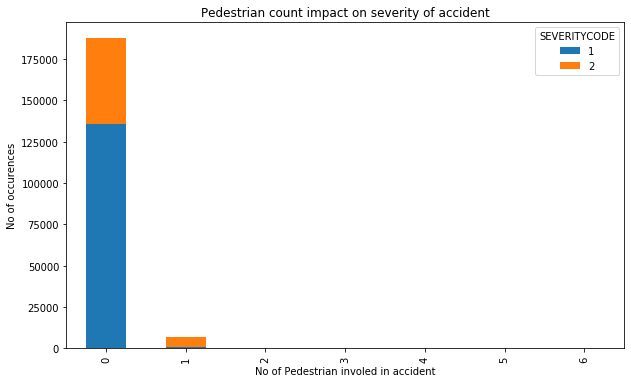

In [212]:
plt.rcParams["figure.figsize"] = [10,6]
acc[['PEDCOUNT','SEVERITYCODE']].groupby(['PEDCOUNT','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('No of Pedestrian involed in accident')
plt.ylabel('No of occurences')
plt.title('Pedestrian count impact on severity of accident')


Text(0.5, 1.0, 'Bicycles involved impact on severity of accident')

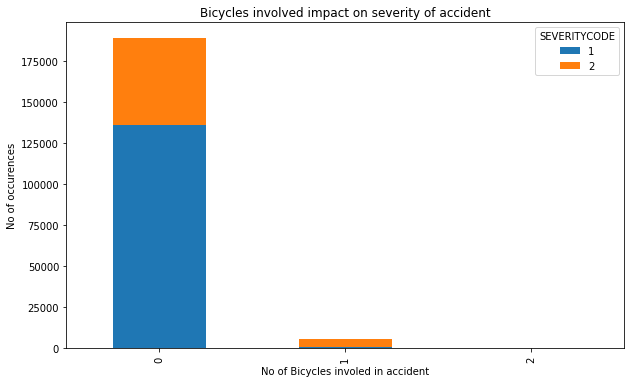

In [213]:
acc[['PEDCYLCOUNT','SEVERITYCODE']].groupby(['PEDCYLCOUNT','SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('No of Bicycles involed in accident')
plt.ylabel('No of occurences')
plt.title('Bicycles involved impact on severity of accident')

**From above bar plots its clear that if the no of pedestrians or the no of Bicycles that involve in an accident is more than 0 then the Severity of accident is 2**

Confusion matrix, without normalization
[[27139   286]
 [ 9321  2189]]
Normalized confusion matrix
[[0.98957156 0.01042844]
 [0.80981755 0.19018245]]


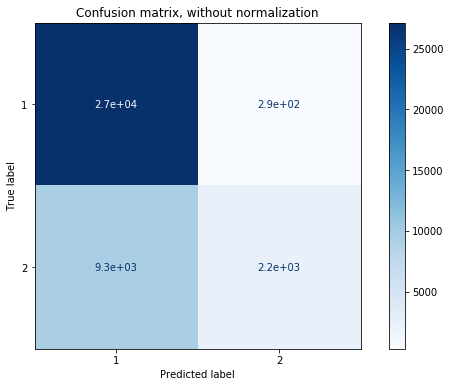

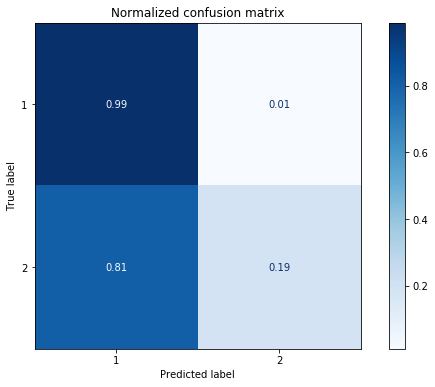

In [221]:
# Plotting Confusion Matrices for normalized and non-normalized data

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**True positive for Predicting Severity of 1 is 99% affective which is a good sign.**

**But at the same time predicting if the severity is 2 is very less and 81% of such are predicted as 1.
In real world scenarios business will be more interested if the case is more severe as it’s a matter of life or death. 
The model should need more refinement such that it can predict 2 well with giving less importance to severity of 1.
Also data given has more references to severity 1 records than severity 2 and hence a poor prediction for severity 2. It will be good if we get more data on severity 2 so that we can predict it more accurately.**


### Conclusion

**We were able to drill down all the features in the given dataset and end-up the model with only 2 features with accuracy of 73.8%. 
The model predicts 99% accurately if the severity is 1.
This model can be used by businesses to lookup for if the accident severity is 1.
There needs to be more refinement to predict the severity 2 and more such data can help in predicting more severe cases accurately.**